In [ ]:
#https://colab.research.google.com/drive/1sJCkSMLVWQml9ohyOxgDuyfarK7UAZCU?usp=sharing

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
!pip install matplotlib==3.1.3
!pip install cmdstanpy>=1.0.1
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
import matplotlib.pyplot as plot

In [5]:
#Questões 1.A até 1.G:

dataset = pd.read_csv('kobe_bryant_shots_data.csv')

filter1 = dataset['shot_made_flag']
shot_made_flag = filter1[dataset['shot_made_flag'] == 1 ].dropna().count()
shot_made_flag_not = filter1[dataset['shot_made_flag'] != 1 ].dropna().count()
convertion = round( ( shot_made_flag / (shot_made_flag + shot_made_flag_not) ) * 100, 2 )
max_distance = dataset[dataset['shot_made_flag'] == 1].max()
shotEfficient = dataset[dataset['shot_made_flag'] == 1].dropna().groupby('period').sum()
shotEfficient.reset_index(inplace=True)
efficient = shotEfficient['shot_made_flag'].dropna().max()
period = shotEfficient[shotEfficient['shot_made_flag'] == efficient]
shotTypeEfficient = dataset[dataset['shot_made_flag'] == 1].dropna().groupby('shot_type').sum()
shotTypeEfficient.reset_index(inplace=True)
typeEfficient = shotTypeEfficient['shot_made_flag'].dropna().max()
shotType = shotTypeEfficient[shotTypeEfficient['shot_made_flag'] == typeEfficient]
seasonBest = dataset[dataset['shot_made_flag'] == 1].dropna().groupby('season').sum()
seasonBest.reset_index(inplace=True)
seasonEfficient = seasonBest['shot_made_flag'].dropna().max()
seasonShotType = seasonBest[seasonBest['shot_made_flag'] == seasonEfficient]

                         
print(f'1.A Conte quantos arremessos foram convertidos (shot_made_flag): {shot_made_flag}')
print(f'1.B Calcule qual foi a taxa de sucesso (eficiência) para todos os arremessos (total de arremessos convertidos/ total de arremessos feitos): {convertion}')
print(f'1.C Qual foi o arremesso convertido mais distante?: {max_distance[13]}')
print(f'1.D Qual o quarto do jogo que o Kobe Bryant é mais eficiente?: {period.period.max()}')
print(f'1.E Agrupe pelo tipo de arremesso e descubra em qual tipo de arremesso o Kobe Bryant é mais eficiente;"{shotType.shot_type.max()}"')
print(f'1.F Qual foi a melhor temporada do Kobe Bryant em relação ao percentual de cestas convertidas?"{seasonShotType.season.unique()[0]}"')


1.A Conte quantos arremessos foram convertidos (shot_made_flag): 11465
1.B Calcule qual foi a taxa de sucesso (eficiência) para todos os arremessos (total de arremessos convertidos/ total de arremessos feitos): 44.62
1.C Qual foi o arremesso convertido mais distante?: 43
1.D Qual o quarto do jogo que o Kobe Bryant é mais eficiente?: 3
1.E Agrupe pelo tipo de arremesso e descubra em qual tipo de arremesso o Kobe Bryant é mais eficiente;"2PT Field Goal"
1.F Qual foi a melhor temporada do Kobe Bryant em relação ao percentual de cestas convertidas?"2005-06"


In [6]:
shotTypeSeason = dataset.dropna().groupby(['season','shot_type']).count().sort_values('season',ascending=True)

print(f'1.G Conte o tipo de arremesso por temporada:' "Números agrupados no df shotType")
shotTypeSeason

1.G Conte o tipo de arremesso por temporada:Números agrupados no df shotType


action_type  combined_shot_type  game_event_id  \
season  shot_type                                                        
1996-97 2PT Field Goal          256                 256            256   
        3PT Field Goal          127                 127            127   
1997-98 2PT Field Goal          617                 617            617   
        3PT Field Goal          193                 193            193   
1998-99 2PT Field Goal          654                 654            654   
        3PT Field Goal          111                 111            111   
1999-00 2PT Field Goal         1135                1135           1135   
        3PT Field Goal          177                 177            177   
2000-01 3PT Field Goal          195                 195            195   
        2PT Field Goal         1380                1380           1380   
2001-02 2PT Field Goal         1547                1547           1547   
        3PT Field Goal          161                 161            161   
2002-03 2PT Field Goal         1531                1531           1531   
        3PT Field Goal          321                 321            321   
2003-04 2PT Field Goal         1105                1105           1105   
        3PT Field Goal          266                 266            266   
2004-05 2PT Field Goal          793                 793            793   
        3PT Field Goal          334                 334            334   
2005-06 3PT Field Goal          465                 465            465   
        2PT Field Goal         1459                1459           1459   
2006-07 2PT Field Goal         1230                1230           1230   
        3PT Field Goal          349                 349            349   
2007-08 2PT Field Goal         1387                1387           1387   
        3PT Field Goal          432                 432            432   
2008-09 2PT Field Goal         1479                1479           1479   
        3PT Field Goal          372                 372            372   
2009-10 2PT Field Goal         1406                1406           1406   
        3PT Field Goal          366                 366            366   
2010-11 3PT Field Goal          330                 330            330   
        2PT Field Goal         1191                1191           1191   
2011-12 2PT Field Goal         1114                1114           1114   
        3PT Field Goal          302                 302            302   
2012-13 2PT Field Goal          993                 993            993   
        3PT Field Goal          335                 335            335   
2013-14 2PT Field Goal           47                  47             47   
        3PT Field Goal           12                  12             12   
2014-15 2PT Field Goal          434                 434            434   
        3PT Field Goal          159                 159            159   
2015-16 2PT Field Goal          527                 527            527   
        3PT Field Goal          405                 405            405   

                        game_id   lat  loc_x  loc_y   lon  minutes_remaining  \
season  shot_type                                                              
1996-97 2PT Field Goal      256   256    256    256   256                256   
        3PT Field Goal      127   127    127    127   127                127   
1997-98 2PT Field Goal      617   617    617    617   617                617   
        3PT Field Goal      193   193    193    193   193                193   
1998-99 2PT Field Goal      654   654    654    654   654                654   
        3PT Field Goal      111   111    111    111   111                111   
1999-00 2PT Field Goal     1135  1135   1135   1135  1135               1135   
        3PT Field Goal      177   177    177    177   177                177   
2000-01 3PT Field Goal      195   195    195    195   195                195   
        2PT Field Goal     1380  13

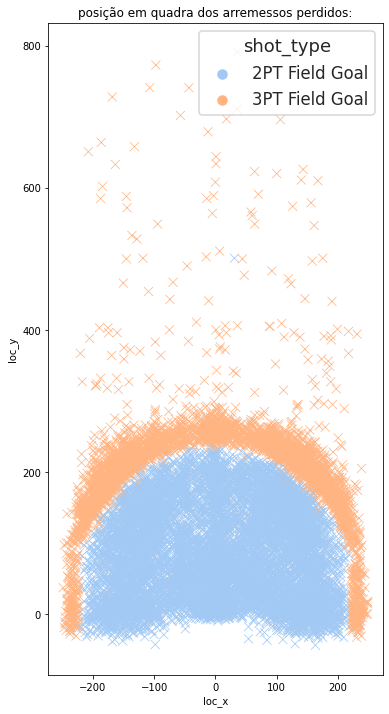

In [7]:
#questão 1.H:

shotLoc = dataset[dataset['shot_made_flag'] == 1].dropna()
shotLocNot = dataset[dataset['shot_made_flag'] != 1].dropna()
fig, ax = plot.subplots(figsize = (6,12)) 
ax.set_title( "posição em quadra dos arremessos perdidos:" , size = 12 )
sns.set_style("ticks")
sns.set_context("talk")
sns.scatterplot(ax=ax, data=shotLocNot, x="loc_x", y="loc_y", hue="shot_type", palette="pastel", legend="full", marker="x")

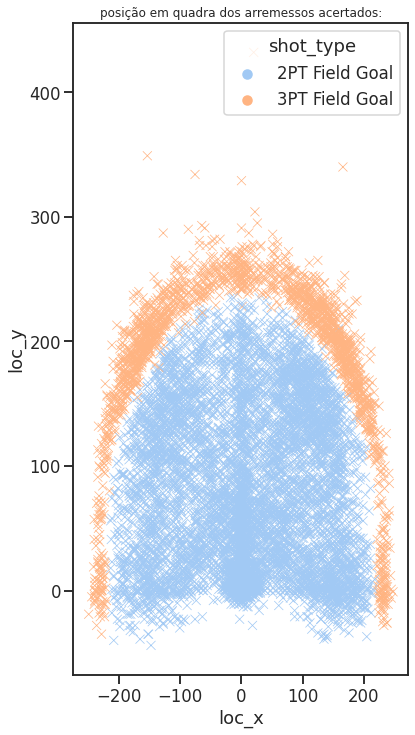

In [8]:
#questão 1.H:

shotLoc = dataset[dataset['shot_made_flag'] == 1].dropna()
shotLocNot = dataset[dataset['shot_made_flag'] != 1].dropna()
fig, ax = plot.subplots(figsize = (6,12)) 
ax.set_title( "posição em quadra dos arremessos acertados:" , size = 12 )
sns.set_style("ticks")
sns.set_context("talk")
sns.scatterplot(data=shotLoc, x="loc_x", y="loc_y", hue="shot_type", palette="pastel", legend="full", marker="x")

In [9]:
#questão 1-I
shotDistanceMean = round( dataset[dataset['shot_made_flag'] == 1].shot_distance.dropna().mean(), 2 )
shotDistanceMeanNot = round( dataset[dataset['shot_made_flag'] != 1].shot_distance.dropna().mean(), 2 )

print(f'1.I - Qual a distância média dos arremessos convertidos? Qual a distância média dos arremessos não-convertidos? {shotDistanceMean} metros e {shotDistanceMeanNot} metros')

1.I - Qual a distância média dos arremessos convertidos? Qual a distância média dos arremessos não-convertidos? 11.38 metros e 14.66 metros
